In [61]:
##We load the packages used at the work
##We are going to use as rule pd for Pandas
##If you are going to use Matplotlib, Numpy or
##other, you should search how to name them 
## as rule.
##For keep the order you can use prettier
## in vscode

##Pandas is similar to tidyverse
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
##The next package is used to format tables
##In the next lines you can watch how to use it
from tabulate import tabulate



##La tabla que vamos a emplear es esta, las demás han
##sido eliminadas
file="SouthGermanCredit.asc"
data=pd.read_csv(file," ")

##We are going to change the name of the variables 
##because in German is difficult to us work.
names={'laufkont':'Status',
        'laufzeit':'Duracion',
        'moral':'Historial_Crediticio',
        'verw':'Proposito',
        'hoehe':'Monto',
        'sparkont':'Ahorros',
        'beszeit':'Tiempo_trabajando',
        'rate':'Porcentaje_salario',
        'famges':'Estado_civil_sexo',
        'buerge':'Otros_deudores',
        'wohnzeit':'Residencia',
        'verm':'Propiedad_valiosa',
        'alter':'Edad',
        'weitkred':'Otras_deudas',
        'wohn':'Residencia',
        'bishkred':'Creditos_banco',
        'beruf':'Empleo',
        'pers':'Personas_dependientes',
        'telef':'Telefono',
        'gastarb':'Extranjero',
        'kredit':'Default',}


data.rename(columns=names,inplace=True)
print(data.head(5))
#print(tabulate(data.head(5),headers='keys',tablefmt='latex_longtable'))


   Status  Duracion  Historial_Crediticio  Proposito  Monto  Ahorros  \
0       1        18                     4          2   1049        1   
1       1         9                     4          0   2799        1   
2       2        12                     2          9    841        2   
3       1        12                     4          0   2122        1   
4       1        12                     4          0   2171        1   

   Tiempo_trabajando  Porcentaje_salario  Estado_civil_sexo  Otros_deudores  \
0                  2                   4                  2               1   
1                  3                   2                  3               1   
2                  4                   2                  2               1   
3                  3                   3                  3               1   
4                  3                   4                  3               1   

   ...  Propiedad_valiosa  Edad  Otras_deudas  Residencia  Creditos_banco  \
0  ...         

c:\Users\sabat\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [102]:
##Check NaN values
data.isnull().values.any()


##It's contructed a table of min and max of all to know if 
##the data doesn't have mistakes
data_mode=data.drop(['Duracion','Edad','Monto'],axis=1).mode()
data_mode=data_mode.transpose().rename(columns={0:'Moda'}).transpose()

data_1=data.drop(['Duracion','Edad','Monto'],axis=1).agg(['min','max']).append(data_mode,ignore_index=False)
print(tabulate(data_1.transpose(),headers='keys',tablefmt='latex_longtable'))


\begin{longtable}{lrrr}
\hline
                       &   min &   max &   Moda \\
\hline
\endhead
 Status                &     1 &     4 &      4 \\
 Historial\_Crediticio  &     0 &     4 &      2 \\
 Proposito             &     0 &    10 &      3 \\
 Ahorros               &     1 &     5 &      1 \\
 Tiempo\_trabajando     &     1 &     5 &      3 \\
 Porcentaje\_salario    &     1 &     4 &      4 \\
 Estado\_civil\_sexo     &     1 &     4 &      3 \\
 Otros\_deudores        &     1 &     3 &      1 \\
 Residencia            &     1 &     4 &      4 \\
 Propiedad\_valiosa     &     1 &     4 &      3 \\
 Otras\_deudas          &     1 &     3 &      3 \\
 Residencia            &     1 &     3 &      2 \\
 Creditos\_banco        &     1 &     4 &      1 \\
 Empleo                &     1 &     4 &      3 \\
 Personas\_dependientes &     1 &     2 &      2 \\
 Telefono              &     1 &     2 &      1 \\
 Extranjero            &     1 &     2 &      2 \\
 Default               & 

C:\Users\saac9\AppData\Local\Temp\ipykernel_3084\3672225097.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_1=data.drop(['Duracion','Edad','Monto'],axis=1).agg(['min','max']).append(data_mode,ignore_index=False)


In [93]:
##We are going to construct the tables
##We are going to do a resume of five numbers
##Duracion, Monto, Edad
##First we select this three columns
##This new variable is the data.frame with,
##what we want
data_2=data[['Duracion','Edad','Monto']]

summary_2=data_2.describe().transpose()
summary_2=summary_2.loc[:,summary_2.columns!='count']



print(tabulate(summary_2,headers='keys',tablefmt='latex_longtable'))

,mean,std,min,25%,50%,75%,max
Duracion,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Edad,35.542,11.352670,19.0,27.0,33.0,42.00,75.0
Monto,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
Tiempo_trabajando,3.384,1.208306,1.0,3.0,3.0,5.00,5.0


In [101]:
#We estimate the quartile coefficient of dispersion
summary_2['Coeficiente de dispersion cuartil']=(summary_2['75%']-summary_2['25%'])/(summary_2['75%']+summary_2['25%'])
summary_2['Coeficiente de variacion']=summary_2['std']/summary_2['mean']

print(tabulate(summary_2[['Coeficiente de dispersion cuartial','Coeficiente de variacion']],headers='keys',floatfmt=".4f",tablefmt='latex_longtable'))

\begin{longtable}{lrr}
\hline
                   &   Coeficiente de dispersion cuartial &   Coeficiente de variacion \\
\hline
\endhead
 Duracion          &                               0.3333 &                     0.5769 \\
 Edad              &                               0.2174 &                     0.3194 \\
 Monto             &                               0.4884 &                     0.8629 \\
 Tiempo\_trabajando &                               0.2500 &                     0.3571 \\
\hline
\end{longtable}


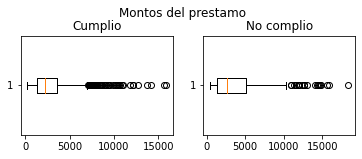

In [64]:
datosG1 = data.loc[:, ["Monto", "Default"]]
datosG1[datosG1["Default"]==1]

plt.subplot(2, 2, 1)
plt.boxplot(datosG1[datosG1["Default"]==1].Monto,vert=False)
plt.title("Cumplio")

plt.subplot(2, 2, 2)
plt.boxplot(datosG1[datosG1["Default"]==0].Monto,vert=False)
plt.title("No complio")

plt.suptitle("Montos del prestamo")
plt.show()

In [103]:
##A table count savings and default
savings_default=pd.crosstab(index=data['Default'],columns=data['Ahorros'],margins=True)
print(tabulate(savings_default,headers='keys',tablefmt='latex_longtable'))

\begin{longtable}{lrrrrrr}
\hline
 Default   &   1 &   2 &   3 &   4 &   5 &   All \\
\hline
\endhead
 0         & 217 &  34 &  11 &   6 &  32 &   300 \\
 1         & 386 &  69 &  52 &  42 & 151 &   700 \\
 All       & 603 & 103 &  63 &  48 & 183 &  1000 \\
\hline
\end{longtable}


Text(0.5, 1.0, 'bars with legend')

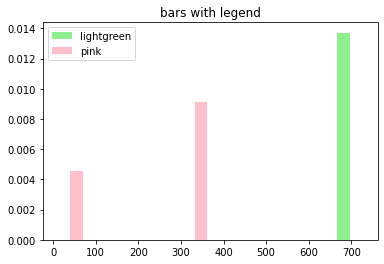

In [79]:
fig, ax0 = plt.subplots()
eje3=[eje1[1], eje2[1]]
colors = ['lightgreen','pink']
ax0.hist(eje3, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')